In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import random as rn

In [270]:
n_d = 10

# FX

In [271]:
def Fx_Sphere(arr):
    arr = np.sum(np.power(arr,2))
    return arr
def Schwefel_Fx(arr):
    arr = 418.9829*10-np.sum(arr*np.sin(np.sqrt(np.abs(arr))))
    return arr
def Ackley_Fx(arr):
    arr = -20*np.exp(-0.2*np.sqrt((1/10)*np.sum(np.power(arr,2))))-np.exp((1/10)*np.sum(np.cos(2*np.pi*arr)))+20+np.exp(1)
    return arr

# LS

In [272]:
def init(lef_lim, rig_lim,n_d,init_val):
    arr = np.empty(0)
    for i in range(n_d):
        arr = np.insert(arr,i,init_val)
        arr = np.where(arr>lef_lim,lef_lim,arr)
        arr = np.where(arr<rig_lim,rig_lim,arr)
    return arr

def area_g(arr,lef_lim,rig_lim):
    area_f = np.empty(0)
    for i in range(len(arr)):
        mu, sig = arr[i], ((lef_lim-rig_lim)/100)*0.1
        area = np.random.normal(mu,sig,9)
        area = np.insert(area,0,mu)
        area = np.where(area>lef_lim,lef_lim,area)
        area = np.where(area<rig_lim,rig_lim,area)
        area_f = np.append(area_f,area)
    return area_f

def search0(n_it,Fx_presc,n_d,lef_lim,rig_lim,init_val):
    B_sol_res = [ ]
    arr = init(lef_lim,rig_lim,n_d,init_val)
    B_sol = Fx_presc(arr)
    for it in range(n_it):
        arr = area_g(arr,lef_lim,rig_lim)
        arr_step = np.empty(0)
        for dim in range(n_d):
            arr1 = arr[dim*10:(dim+1)*10]
            arr2 = np.empty(0)
            for i in arr1:
                arr2 = np.append(arr2,Fx_presc(i))
            arr_dic = dict(zip(arr1,arr2))
            step = min(arr_dic.items(), key=lambda x: x[1])
            arr_step = np.append(arr_step,step[0])
        arr = arr_step
        if B_sol > Fx_presc(arr):
            B_sol = Fx_presc(arr)
        B_sol_res.append(B_sol)
        
    return B_sol_res

In [273]:
B_sol_res_LS_SP = search0(1000,Fx_Sphere,10,5,-5,4.5)

In [274]:
B_sol_res_LS_Sch = search0(1000,Schwefel_Fx,10,500,-500,50)

In [275]:
B_sol_res_LS_Ack = search0(1000,Ackley_Fx,10,32.768,-32.768,30)

stats

In [276]:
B_sol_res_LS_SP_st_res = [ ]
B_sol_res_LS_Sch_st_res = [ ]
B_sol_res_LS_Ack_st_res = [ ]
for i in range(30):
    B_sol_res_LS_SP_st = search0(1000,Fx_Sphere,10,5,-5,4.5)
    B_sol_res_LS_SP_st_res.append(B_sol_res_LS_SP_st[-1])
    B_sol_res_LS_Sch_st = search0(1000,Schwefel_Fx,10,500,-500,50)
    B_sol_res_LS_Sch_st_res.append(B_sol_res_LS_Sch_st[-1])
    B_sol_res_LS_Ack = search0(1000,Ackley_Fx,10,32.768,-32.768,30)
    B_sol_res_LS_Ack_st_res.append(B_sol_res_LS_Ack[-1])

# HC

In [277]:
def init(lef_lim, rig_lim,n_d,init_val):
    arr = np.empty(0)
    for i in range(n_d):
        arr = np.insert(arr,i,init_val)
        arr = np.where(arr>lef_lim,lef_lim,arr)
        arr = np.where(arr<rig_lim,rig_lim,arr)
    return arr

def area_g(arr,lef_lim, rig_lim):
    area_f = np.empty(0)
    for i in range(len(arr)):
        mu, sig = arr[i], ((lef_lim-rig_lim)/100)*3
        area = np.random.normal(mu,sig,10)
        area = np.where(area>lef_lim,lef_lim,area)
        area = np.where(area<rig_lim,rig_lim,area)
        area_f = np.append(area_f,area)
    return area_f

def search1(n_it,Fx_presc,n_d,lef_lim,rig_lim,init_val):
    B_sol_res = [ ]
    arr = init(lef_lim,rig_lim,n_d,init_val)
    B_sol = Fx_presc(arr)
    for it in range(n_it):
        arr = area_g(arr,lef_lim, rig_lim)
        arr_step = np.empty(0)
        for dim in range(n_d):
            arr1 = arr[dim*10:(dim+1)*10]
            arr2 = np.empty(0)
            for i in arr1:
                arr2 = np.append(arr2,Fx_presc(i))
            arr_dic = dict(zip(arr1,arr2))
            step = min(arr_dic.items(), key=lambda x: x[1])
            arr_step = np.append(arr_step,step[0])
        arr = arr_step
        B_sol = Fx_presc(arr)
        B_sol_res.append(B_sol)
    return B_sol_res

In [278]:
B_sol_res_HC_SP = search1(1000,Fx_Sphere,10,5,-5,4.5)

In [279]:
B_sol_res_HC_Sch = search1(1000,Schwefel_Fx,10,500,-500,50)

In [280]:
B_sol_res_HC_Ack = search1(1000,Ackley_Fx,10,32.768,-32.768,30)

In [281]:
B_sol_res_HC_SP_st_res = [ ]
B_sol_res_HC_Sch_st_res = [ ]
B_sol_res_HC_Ack_st_res = [ ]
for i in range(30):
    B_sol_res_HC_SP_st = search1(1000,Fx_Sphere,10,5,-5,4.5)
    B_sol_res_HC_SP_st_res.append(B_sol_res_HC_SP_st[-1])
    B_sol_res_HC_Sch_st = search1(1000,Schwefel_Fx,10,500,-500,50)
    B_sol_res_HC_Sch_st_res.append(B_sol_res_HC_Sch_st[-1])
    B_sol_res_HC_Ack = search1(1000,Ackley_Fx,10,32.768,-32.768,30)
    B_sol_res_HC_Ack_st_res.append(B_sol_res_HC_Ack[-1])

# SA

In [282]:
def init(lef_lim, rig_lim,n_d,init_val):
    arr = np.empty(0)
    for i in range(n_d):
        arr = np.insert(arr,i,init_val)
        arr = np.where(arr>lef_lim,lef_lim,arr)
        arr = np.where(arr<rig_lim,rig_lim,arr)
    return arr

def area_g(arr,i,lef_lim, rig_lim,t_0):
    area_f = np.empty(0)
    for i in range(len(arr)):
        mu, sig = arr[i],abs((t_0-0.7*i)/150)
        area = np.random.normal(mu,sig,1)
        area = np.where(area>lef_lim,lef_lim,area)
        area = np.where(area<rig_lim,rig_lim,area)
        area_f = np.append(area_f,area)
    return area_f

def search2(t_0,t_end,n_d,Fx_presc,lef_lim,rig_lim,init_val):
    B_sol_list = [ ]
    B_sol = np.empty(0)
    n_nei = 10
    arr = init(lef_lim,rig_lim,n_d,init_val)
    B_sol = Fx_presc(arr)
    for i in range(1000):
        for nei in range(n_nei):
            nei_g = area_g(arr,i,lef_lim, rig_lim,t_0)
            delta_fx = Fx_presc(nei_g)-Fx_presc(arr)
            if delta_fx<0:
                arr = nei_g
            if Fx_presc(nei_g) < Fx_presc(B_sol):
                B_sol = nei_g
            else:
                r = rn.uniform(0, 1)
                if r< np.power(np.e,-delta_fx/t_0):
                    arr = nei_g
        B_sol_list.append(Fx_presc(B_sol))
        t_0 = t_0-0.7*i
    return B_sol_list

In [283]:
B_sol_res_SA_SP = search2(700,0,10,Fx_Sphere,5,-5,4.5)

In [284]:
B_sol_res_SA_Sch = search2(700,0,10,Schwefel_Fx,500,-500,50)

In [285]:
B_sol_res_SA_Ack = search2(700,0,10,Ackley_Fx,32.768,-32.768,30)

In [286]:
B_sol_res_SA_SP_st_res = [ ]
B_sol_res_SA_Sch_st_res = [ ]
B_sol_res_SA_Ack_st_res = [ ]
for i in range(30):
    B_sol_res_SA_SP_st = search2(700,0,10,Fx_Sphere,5,-5,4.5)
    B_sol_res_SA_SP_st_res.append(B_sol_res_SA_SP_st[-1])
    B_sol_res_SA_Sch_st = search2(700,0,10,Schwefel_Fx,500,-500,50)
    B_sol_res_SA_Sch_st_res.append(B_sol_res_SA_Sch_st[-1])
    B_sol_res_SA_Ack = search2(700,0,10,Ackley_Fx,32.768,-32.768,30)
    B_sol_res_SA_Ack_st_res.append(B_sol_res_SA_Ack[-1])

# Sphere results

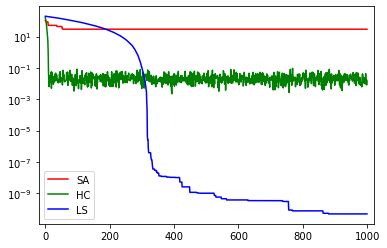

In [287]:
plt.plot(B_sol_res_SA_SP,color = 'red',label='SA')
plt.plot(B_sol_res_HC_SP,color = 'green',label='HC')
plt.plot(B_sol_res_LS_SP,color ='blue',label='LS')
plt.xlim(-20,1020)
plt.yscale('log',base =10)
plt.legend()
plt.show()

In [288]:
B_sol_res_LS_SP_st_res
B_sol_res_HC_SP_st_res
B_sol_res_SA_SP_st_res

columns_lab = ['Algorithm','Min','Max','Mean','Median','STD']
labels = np.array(['LS','HC','SA'])
Min = np.array([np.min(B_sol_res_LS_SP_st_res),np.min(B_sol_res_HC_SP_st_res),np.min(B_sol_res_SA_SP_st_res)])
Max = np.array([np.max(B_sol_res_LS_SP_st_res),np.max(B_sol_res_HC_SP_st_res),np.max(B_sol_res_SA_SP_st_res)])
Mean = np.array([np.mean(B_sol_res_LS_SP_st_res),np.mean(B_sol_res_HC_SP_st_res),np.mean(B_sol_res_SA_SP_st_res)])
Median = np.array([np.median(B_sol_res_LS_SP_st_res),np.median(B_sol_res_HC_SP_st_res),np.median(B_sol_res_SA_SP_st_res)])
STD = np.array([np.std(B_sol_res_LS_SP_st_res),np.std(B_sol_res_HC_SP_st_res),np.std(B_sol_res_SA_SP_st_res)])
data = np.vstack([labels,Min,Max,Mean,Median,STD])
df = pd.DataFrame(data)
df = df.T
df.columns = columns_lab
df

,Algorithm,Min,Max,Mean,Median,STD
0,LS,1.3745453861797375e-11,2.0415483208328712e-10,7.906613370756528e-11,7.113722447145401e-11,4.9860806134296795e-11
1,HC,0.002124476754762126,0.07006507880326639,0.026320008312042842,0.020976405977823596,0.016213558053594132
2,SA,22.702867296735363,55.04636409786013,38.8868324576546,41.27541028671064,9.74662245286863


# Schwefel results

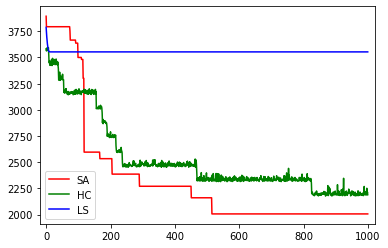

In [289]:
plt.plot(B_sol_res_SA_Sch,color = 'red',label='SA')
plt.plot(B_sol_res_HC_Sch,color = 'green',label='HC')
plt.plot(B_sol_res_LS_Sch,color ='blue',label='LS')
plt.xlim(-20,1020)
plt.legend()
plt.show()

In [290]:
B_sol_res_LS_Sch_st_res
B_sol_res_HC_Sch_st_res
B_sol_res_SA_Sch_st_res

columns_lab = ['Algorithm','Min','Max','Mean','Median','STD']
labels = np.array(['LS','HC','SA'])
Min = np.array([np.min(B_sol_res_LS_Sch_st_res),np.min(B_sol_res_HC_Sch_st_res),np.min(B_sol_res_SA_Sch_st_res)])
Max = np.array([np.max(B_sol_res_LS_Sch_st_res),np.max(B_sol_res_HC_Sch_st_res),np.max(B_sol_res_SA_Sch_st_res)])
Mean = np.array([np.mean(B_sol_res_LS_Sch_st_res),np.mean(B_sol_res_HC_Sch_st_res),np.mean(B_sol_res_SA_Sch_st_res)])
Median = np.array([np.median(B_sol_res_LS_Sch_st_res),np.median(B_sol_res_HC_Sch_st_res),np.median(B_sol_res_SA_Sch_st_res)])
STD = np.array([np.std(B_sol_res_LS_Sch_st_res),np.std(B_sol_res_HC_Sch_st_res),np.std(B_sol_res_SA_Sch_st_res)])
data = np.vstack([labels,Min,Max,Mean,Median,STD])
df = pd.DataFrame(data)
df = df.T
df.columns = columns_lab
df

,Algorithm,Min,Max,Mean,Median,STD
0,LS,3553.47918049401,3553.479180623071,3553.479180535957,3553.4791805348905,2.8411452629035198e-08
1,HC,2174.0390253053056,2353.0330552231544,2229.4747479146886,2209.6228889499243,52.92177355640163
2,SA,1827.3577335254467,2269.9323387684112,2062.6898032887348,2058.8525912364767,111.43955803236787


# Ackley results

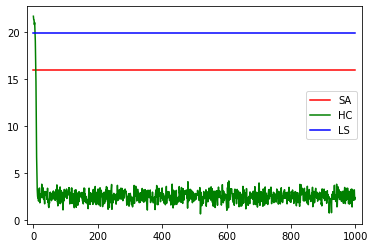

In [291]:
plt.plot(B_sol_res_SA_Ack,color = 'red',label='SA')
plt.plot(B_sol_res_HC_Ack,color = 'green',label='HC')
plt.plot(B_sol_res_LS_Ack,color ='blue',label='LS')
plt.xlim(-20,1020)
plt.legend()
plt.show()

In [292]:
B_sol_res_LS_Ack_st_res
B_sol_res_HC_Ack_st_res
B_sol_res_SA_Ack_st_res

columns_lab = ['Algorithm','Min','Max','Mean','Median','STD']
labels = np.array(['LS','HC','SA'])
Min = np.array([np.min(B_sol_res_LS_Ack_st_res),np.min(B_sol_res_HC_Ack_st_res),np.min(B_sol_res_SA_Ack_st_res)])
Max = np.array([np.max(B_sol_res_LS_Ack_st_res),np.max(B_sol_res_HC_Ack_st_res),np.max(B_sol_res_SA_Ack_st_res)])
Mean = np.array([np.mean(B_sol_res_LS_Ack_st_res),np.mean(B_sol_res_HC_Ack_st_res),np.mean(B_sol_res_SA_Ack_st_res)])
Median = np.array([np.median(B_sol_res_LS_Ack_st_res),np.median(B_sol_res_HC_Ack_st_res),np.median(B_sol_res_SA_Ack_st_res)])
STD = np.array([np.std(B_sol_res_LS_Ack_st_res),np.std(B_sol_res_HC_Ack_st_res),np.std(B_sol_res_SA_Ack_st_res)])
data = np.vstack([labels,Min,Max,Mean,Median,STD])
df = pd.DataFrame(data)
df = df.T
df.columns = columns_lab
df

,Algorithm,Min,Max,Mean,Median,STD
0,LS,19.950424956466673,19.950424956466673,19.950424956466676,19.950424956466673,3.552713678800501e-15
1,HC,1.54303927149838,3.3212252736697363,2.6221354119067444,2.686242932614905,0.4621313146132937
2,SA,15.955400424244553,15.955400424244553,15.955400424244552,15.955400424244553,1.7763568394002505e-15
